<a href="https://colab.research.google.com/github/Farisnerd/Farisnerd/blob/main/L3_%3CAL_SUNAIDI_FARIS%3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()

# New Section

In [ ]:
df_hotels = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv')

In [ ]:
df_hotels = df_hotels.reset_index().rename(columns={'index':'id'})

In [ ]:
def check_values(df):
    data = []
    for column in df.columns:
        data.append([
            column, \
            df[column].dtype, \
            df[column].isna().sum(), \
            round(100*(df[column].isna().sum()/len(df)),2), \
            df[column].nunique()
        ])
    return pd.DataFrame(columns=['Data_Features','Data_Type','Null','Null_Percentage','Unique_Value'], data=data)

check_values(df_hotels)

,Data_Features,Data_Type,Null,Null_Percentage,Unique_Value
0,id,int64,0,0.00,119390
1,hotel,object,0,0.00,2
2,is_canceled,int64,0,0.00,2
3,lead_time,int64,0,0.00,479
4,arrival_date_year,int64,0,0.00,3
5,arrival_date_month,object,0,0.00,12
6,arrival_date_week_number,int64,0,0.00,53
7,arrival_date_day_of_month,int64,0,0.00,31
8,stays_in_weekend_nights,int64,0,0.00,17
9,stays_in_week_nights,int64,0,0.00,35


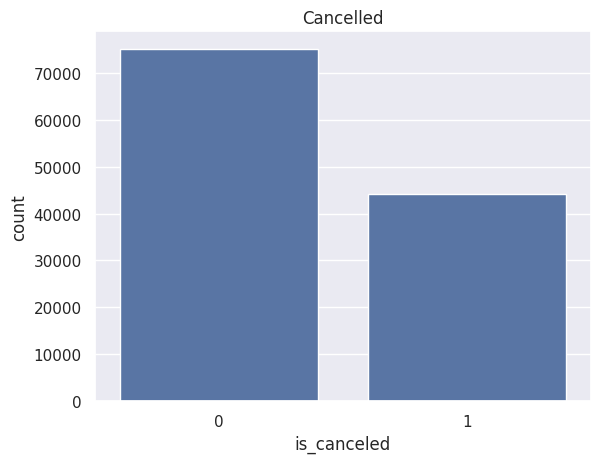

In [ ]:
df_hotels.is_canceled.value_counts()
df_hotels.is_canceled.value_counts(normalize=True)
sns.countplot(data=df_hotels, x='is_canceled')
plt.title('Cancelled')
plt.show()

In [ ]:
# City Hotel
round(100*(len(df_hotels[(df_hotels.hotel=='City Hotel')&(df_hotels.is_canceled==1)])/len(df_hotels[df_hotels.hotel=='City Hotel'])),2)

# Resort Hotel
round(100*(len(df_hotels[(df_hotels.hotel=='Resort Hotel')&(df_hotels.is_canceled==1)])/len(df_hotels[df_hotels.hotel=='Resort Hotel'])),2)

27.76

In [ ]:
df_checkout = df_hotels[df_hotels.is_canceled==0]

In [ ]:
df_checkout.groupby(['hotel','arrival_date_month'])['id'].nunique()

hotel         arrival_date_month
City Hotel    April                 4015
              August                5381
              December              2392
              February              3064
              January               2254
              July                  4782
              June                  4366
              March                 4072
              May                   4579
              November              2696
              October               4337
              September             4290
Resort Hotel  April                 2550
              August                3257
              December              2017
              February              2308
              January               1868
              July                  3137
              June                  2038
              March                 2573
              May                   2535
              November              1976
              October               2577
              September             2102
Name: id, dtype: int64

In [ ]:
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df_checkout['arrival_date_month_number'] = df_checkout['arrival_date_month'].map(month_mapping)


<ipython-input-26-af3796bc3665>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date_month_number'] = df_checkout['arrival_date_month'].map(month_mapping)


In [ ]:
df_checkout['arrival_date'] = (
    df_checkout['arrival_date_year'].astype(str) + '-' +
    df_checkout['arrival_date_month_number'].astype(str).str.zfill(2) + '-' +
    df_checkout['arrival_date_day_of_month'].astype(str).str.zfill(2)
)
df_checkout['arrival_date'] = pd.to_datetime(df_checkout['arrival_date'])


<ipython-input-27-94de72f0a038>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date'] = (
<ipython-input-27-94de72f0a038>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date'] = pd.to_datetime(df_checkout['arrival_date'])


In [ ]:
df_checkout['arrival_date'] = pd.to_datetime(df_checkout['arrival_date'])

df_daily_reservation = (
    df_checkout.resample('D', on='arrival_date')
    .size()
    .reset_index(name='daily_reservation')
)

df_avg_daily_reservation_per_week = (
    df_daily_reservation.resample('W', on='arrival_date')['daily_reservation']
    .mean()
    .reset_index(name='avg_daily_reservation_per_week')
    .round(2)
)


<ipython-input-28-657424640568>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date'] = pd.to_datetime(df_checkout['arrival_date'])


In [ ]:
round(df_checkout.groupby(['hotel','customer_type'])['adr'].mean(),2)

hotel         customer_type  
City Hotel    Contract           108.93
              Group               87.40
              Transient          110.42
              Transient-Party     93.71
Resort Hotel  Contract            78.58
              Group               77.31
              Transient           96.00
              Transient-Party     77.20
Name: adr, dtype: float64

In [ ]:
df_country = pd.read_csv('https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv')
df_country['code'] = df_country['Alpha-3 code'].str.replace('"','').str.strip()
df_merged = pd.merge(df_checkout[['id','country']],
                     df_country[['Country','code']],
                     left_on='country',
                     right_on='code',
                     indicator=True,
                     how='left')
df_merged.Country.value_counts().head(10)

,count
Country,
Portugal,21071
United Kingdom,9676
France,8481
Spain,6391
Germany,6069
Ireland,2543
Italy,2433
Belgium,1868
Netherlands,1717


In [ ]:
df_checkout['total_guest'] = df_checkout.adults + df_checkout.children + df_checkout.babies
round(df_checkout.total_guest.mean(),0)
df_checkout.total_guest.max()
df_checkout[df_checkout.total_guest==df_checkout.total_guest.max()].T

<ipython-input-32-34620735bfb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['total_guest'] = df_checkout.adults + df_checkout.children + df_checkout.babies


,46619
id,46619
hotel,City Hotel
is_canceled,0
lead_time,37
arrival_date_year,2016
arrival_date_month,January
arrival_date_week_number,3
arrival_date_day_of_month,12
stays_in_weekend_nights,0
stays_in_week_nights,2
